In [1]:
import os
for dirname, _, _ in os.walk('/kaggle/input'):
        print(os.path.join(dirname))

/kaggle/input
/kaggle/input/siim-isic-melanoma-classification
/kaggle/input/siim-isic-melanoma-classification/train
/kaggle/input/siim-isic-melanoma-classification/tfrecords
/kaggle/input/siim-isic-melanoma-classification/jpeg
/kaggle/input/siim-isic-melanoma-classification/jpeg/train
/kaggle/input/siim-isic-melanoma-classification/jpeg/test
/kaggle/input/siim-isic-melanoma-classification/test
/kaggle/input/melanoma-image-insights


In [2]:
import math
import re

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

%matplotlib inline

In [3]:
print("The version of Tensorflow used  = {}".format(tf.__version__))
print("The version of OpenCV used = {}".format(cv2.__version__))

The version of Tensorflow used  = 2.2.0
The version of OpenCV used = 4.3.0


# Defining Path To Images : 

In [4]:
path_train = "/kaggle/input/siim-isic-melanoma-classification/jpeg/train/"
path_test = "/kaggle/input/siim-isic-melanoma-classification/jpeg/test"

In [5]:
num_of_images_in_training_path = os.listdir(path_train)
num_of_images_in_testing_path = os.listdir(path_test)

print("Number Of images in training path = {}".format(len(num_of_images_in_training_path)))
print("Number of images in testing path = {}".format(len(num_of_images_in_testing_path)))

Number Of images in training path = 33126
Number of images in testing path = 10982


In [6]:
train = pd.DataFrame(pd.read_csv("/kaggle/input/melanoma-image-insights/updated_training_file"))
test = pd.DataFrame(pd.read_csv("/kaggle/input/melanoma-image-insights/updated_test_file"))

print("Shape Of training file = {}".format(train.shape))
print("Shape Of training file = {}".format(test.shape))

Shape Of training file = (33126, 8)
Shape Of training file = (10982, 5)


In [7]:
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,diagnosis,benign_malignant,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,unknown,benign,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,unknown,benign,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,nevus,benign,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,unknown,benign,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,unknown,benign,0


In [8]:
test.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,IP_3579794,male,70.0,torso
1,ISIC_0052349,IP_7782715,male,40.0,lower extremity
2,ISIC_0058510,IP_7960270,female,55.0,torso
3,ISIC_0073313,IP_6375035,female,50.0,torso
4,ISIC_0073502,IP_0589375,female,45.0,lower extremity


In [9]:
train.drop(["diagnosis", "benign_malignant"], axis = 1, inplace = True)
train.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,target
0,ISIC_2637011,IP_7279968,male,45.0,head/neck,0
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity,0
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity,0
3,ISIC_0068279,IP_6890425,female,45.0,head/neck,0
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity,0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null  object 
 1   patient_id                     33126 non-null  object 
 2   sex                            33126 non-null  object 
 3   age_approx                     33126 non-null  float64
 4   anatom_site_general_challenge  33126 non-null  object 
 5   target                         33126 non-null  int64  
dtypes: float64(1), int64(1), object(4)
memory usage: 1.5+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10982 entries, 0 to 10981
Data columns (total 5 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     10982 non-null  object 
 1   patient_id                     10982 non-null  object 
 2   sex                            10982 non-null  object 
 3   age_approx                     10982 non-null  float64
 4   anatom_site_general_challenge  10982 non-null  object 
dtypes: float64(1), object(4)
memory usage: 429.1+ KB


There are no missing values as we are using the updated dataframes we obtained in part 2 of the story!

In [12]:
train_image_stats_01 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_01"))
train_image_stats_02 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_02"))
train_image_stats_03 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_03"))
train_image_stats_04 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_04"))
train_image_stats_05 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_05"))
train_image_stats_06 = pd.DataFrame(pd.read_csv("../input/melanoma-image-insights/melanoma_image_statistics_compiled_06"))

print(train_image_stats_01.shape)
print(train_image_stats_02.shape)
print(train_image_stats_03.shape)
print(train_image_stats_04.shape)
print(train_image_stats_05.shape)
print(train_image_stats_06.shape)

(5000, 11)
(5000, 11)
(5000, 11)
(5000, 11)
(5000, 11)
(8126, 11)


In [13]:
train_image_statistics = pd.concat([train_image_stats_01, train_image_stats_02, train_image_stats_03,
                                   train_image_stats_04, train_image_stats_05, train_image_stats_06],
                                  ignore_index = True)
train_image_statistics.shape

(33126, 11)

In [14]:
train_image_statistics.head()

,image_name,path,rows,columns,channels,image_mean,image_standard_deviation,image_skewness,mean_red_value,mean_green_value,mean_blue_value
0,ISIC_2637011.jpg,/kaggle/input/siim-isic-melanoma-classificatio...,4000,6000,3,169.862452,41.270046,-0.129492,212.933646,138.914514,157.739197
1,ISIC_0015719.jpg,/kaggle/input/siim-isic-melanoma-classificatio...,4000,6000,3,171.084778,41.994142,-0.205430,217.279705,165.095320,130.879309
2,ISIC_0052212.jpg,/kaggle/input/siim-isic-melanoma-classificatio...,1053,1872,3,158.691048,37.364873,-0.551454,199.940391,130.224750,145.908002
3,ISIC_0068279.jpg,/kaggle/input/siim-isic-melanoma-classificatio...,1053,1872,3,80.342856,44.885518,0.453018,119.689502,62.614801,58.724265
4,ISIC_0074268.jpg,/kaggle/input/siim-isic-melanoma-classificatio...,4000,6000,3,183.955453,37.497829,-0.157002,226.269270,173.175601,152.421488


In [15]:
train_image_statistics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   image_name                33126 non-null  object 
 1   path                      33126 non-null  object 
 2   rows                      33126 non-null  int64  
 3   columns                   33126 non-null  int64  
 4   channels                  33126 non-null  int64  
 5   image_mean                33126 non-null  float64
 6   image_standard_deviation  33126 non-null  float64
 7   image_skewness            33126 non-null  float64
 8   mean_red_value            33126 non-null  float64
 9   mean_green_value          33126 non-null  float64
 10  mean_blue_value           33126 non-null  float64
dtypes: float64(6), int64(3), object(2)
memory usage: 2.8+ MB


# Label Encoding of String Values : 

Combining training and testing dataframes.

A chained argument reset_index(drop=True) is passed which drops the current index of the DataFrame and replaces it with an index of increasing integers. It never drops columns. 

In [16]:
combined_dataframe = pd.concat([train[test.columns], test[test.columns]], ignore_index = True, axis = 0).reset_index(drop = True)

print("Shape of combined dataframe = {}".format(combined_dataframe.shape))

Shape of combined dataframe = (44108, 5)


In [17]:
combined_dataframe.head()

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_2637011,IP_7279968,male,45.0,head/neck
1,ISIC_0015719,IP_3075186,female,45.0,upper extremity
2,ISIC_0052212,IP_2842074,female,50.0,lower extremity
3,ISIC_0068279,IP_6890425,female,45.0,head/neck
4,ISIC_0074268,IP_8723313,female,55.0,upper extremity


In [18]:
combined_dataframe["age_approx"] = combined_dataframe.age_approx.astype("int")
combined_dataframe.head(2)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_2637011,IP_7279968,male,45,head/neck
1,ISIC_0015719,IP_3075186,female,45,upper extremity


`Using .factorize() of Pandas for encoding` : 

This method is useful for obtaining a numeric representation of an array when all that matters is identifying distinct values. 

In [19]:
columns_to_encode = ["patient_id", "sex", "anatom_site_general_challenge"]

for column in columns_to_encode : 
    combined_dataframe[column], unique = combined_dataframe[column].factorize()
    print(unique)

Index(['IP_7279968', 'IP_3075186', 'IP_2842074', 'IP_6890425', 'IP_8723313',
       'IP_2950485', 'IP_4698288', 'IP_6017204', 'IP_7622888', 'IP_5075533',
       ...
       'IP_9047138', 'IP_0982737', 'IP_5067246', 'IP_8434843', 'IP_9720911',
       'IP_9891374', 'IP_2906548', 'IP_7260822', 'IP_9671014', 'IP_6528515'],
      dtype='object', length=2746)
Index(['male', 'female'], dtype='object')
Index(['head/neck', 'upper extremity', 'lower extremity', 'torso',
       'palms/soles', 'oral/genital'],
      dtype='object')


In [20]:
combined_dataframe.head(2)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_2637011,0,0,45,0
1,ISIC_0015719,1,1,45,1


Rewriting data to OG dataframes.

In [21]:
train[test.columns] = combined_dataframe.loc[: len(train)-1, test.columns].values
test[test.columns] = combined_dataframe.loc[len(train) : , test.columns].values

print("Shape of train = {}".format(train.shape))
print("Shape of test = {}".format(test.shape))

Shape of train = (33126, 6)
Shape of test = (10982, 5)


In [22]:
train.head(2)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge,target
0,ISIC_2637011,0,0,45,0,0
1,ISIC_0015719,1,1,45,1,0


In [23]:
test.head(2)

,image_name,patient_id,sex,age_approx,anatom_site_general_challenge
0,ISIC_0052060,2056,0,70,3
1,ISIC_0052349,2057,0,40,2


So, it's encoded!!

# TFRecord : 

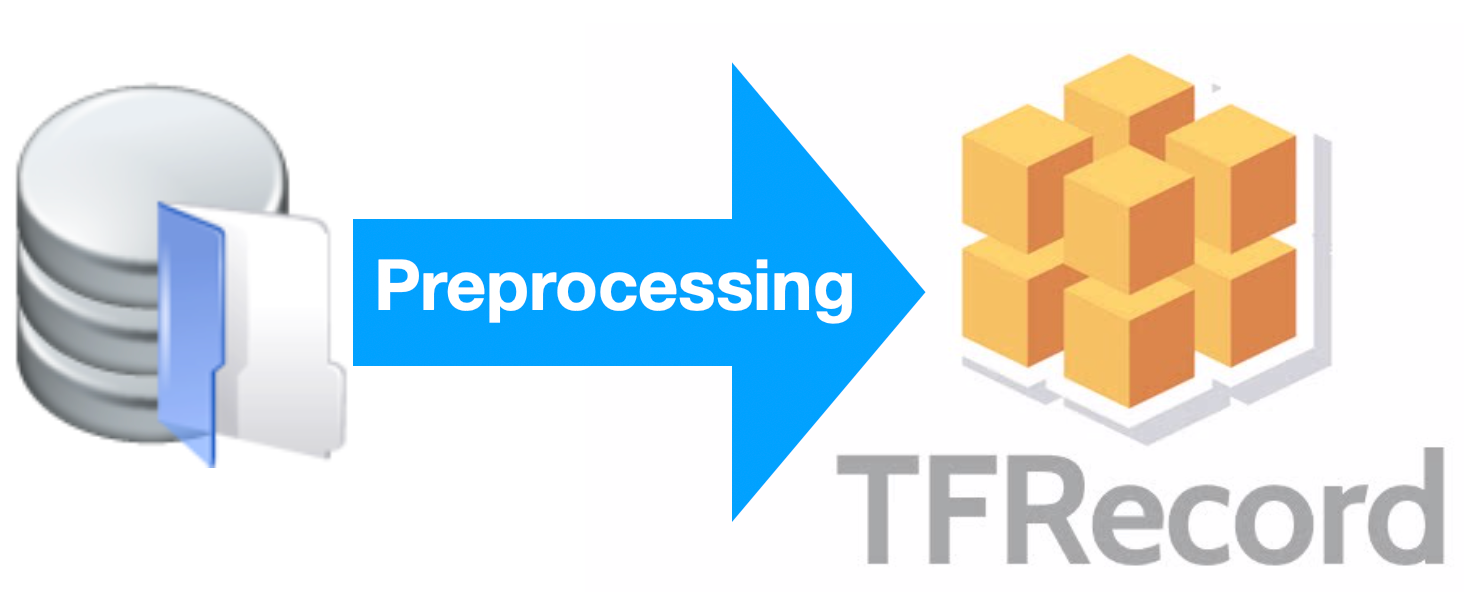 

TF record is Tensorflow's binary storage format for your data.

A TFRecord file contains an array of `Examples`. `Example` is a *data structure for representing a record*, like an observation in a training or test dataset. A record is represented as a set of features, each of which has a name and can be an array of bytes, floats, or 64-bit integers.

To summarize : 

* An Example contains Features.
* Features is a mapping from the feature names stored as strings to Features.

These relations are defined in `example.proto` and `feature.proto` in the TensorFlow's source code, along with extensive comments. As the extension .proto suggests, these definitions are based on `protocol buffers`.

**********************

## Why Protocol Buffers?

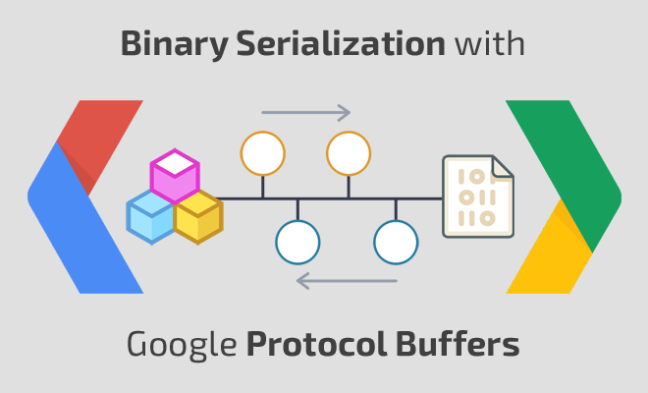

Google’s Protocol buffers are a serialization scheme for structured data. In other words, protocol buffers are used for serializing structured data into a byte array, so that they can be sent over the network or stored as a file. In this sense, it is similar to JSON, XML.

`Protocol buffers can offer a lot faster processing speed compared to text-based formats like JSON or XML`.

**********************

# Writing TFRecord - Train

* `isinstance() function` : Returns True if the specified object is of the specified type, otherwise False. Here, say in the first function tf.constant(0) is `tensorflow.python.framework.ops.EagerTensor`. If passed value happens to be of this type, then True will be retured.

In [24]:
def bytes_features(value) : 
    """
    Returns a bytes_list from a string / byte.
    """
    if isinstance(value, type(tf.constant(0))) :  
        value = value.numpy()
    return tf.train.Feature(bytes_list = tf.train.BytesList(value = [value]))

In [25]:
def float_features(value) : 
    """
    Returns a float_list from a float / double.
    """
    return tf.train.Feature(float_list = tf.train.FloatList(value = [value]))

In [26]:
def int64_features(value) : 
    """
    Returns an int64_list from a bool / enum / int / uint.
    """
    return tf.train.Feature(int64_list = tf.train.Int64List(value = [value]))

Remember, what we said earlier. A TFRecord files is a tensor of records, which are represented using `Example` data structure. This data structure is nothing more than a compilation of `faetures` which map the OG string features to TF compatible feature format.

This is what we are gonna do now. We define a set of features and encapsulate them in an `Example` data structure.

In [27]:
def serialize_example(features_list) : 
    feature = {"image" : bytes_features(features_list[0]),
               "image_name" : bytes_features(features_list[1]),
               "patient_id" : int64_features(features_list[2]),
               "sex" : int64_features(features_list[3]),
               "age_approx" : int64_features(features_list[4]),
               "anatom_site_general_challenge" : int64_features(features_list[5]),
               "target" : int64_features(features_list[6])                   
            }
    example_proto = tf.train.Example(features = tf.train.Features(feature = feature))
    return example_proto.SerializeToString()